<a href="https://colab.research.google.com/github/ozlemefe/ozlemefe/blob/main/store-item-demand-%20forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from time import time

import warnings
warnings.filterwarnings("ignore")


In [5]:
df_train= pd.read_csv('train.csv', parse_dates = ['date'])
df_train


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [30]:
df_train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [6]:
df_test= pd.read_csv('test.csv', parse_dates = ['date'])
df_test

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1
...,...,...,...,...
44995,44995,2018-03-27,10,50
44996,44996,2018-03-28,10,50
44997,44997,2018-03-29,10,50
44998,44998,2018-03-30,10,50


In [31]:
df_test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [7]:
df_all= pd.concat([df_train, df_test], sort= False)
df_all

,date,store,item,sales,id
0,2013-01-01,1,1,13.0,NaN
1,2013-01-02,1,1,11.0,NaN
2,2013-01-03,1,1,14.0,NaN
3,2013-01-04,1,1,13.0,NaN
4,2013-01-05,1,1,10.0,NaN
...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0
44996,2018-03-28,10,50,NaN,44996.0
44997,2018-03-29,10,50,NaN,44997.0
44998,2018-03-30,10,50,NaN,44998.0


In [32]:
df_all.isnull().sum()

date          0
store         0
item          0
sales     45000
id       913000
dtype: int64

In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958000 entries, 0 to 44999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    958000 non-null  datetime64[ns]
 1   store   958000 non-null  int64         
 2   item    958000 non-null  int64         
 3   sales   913000 non-null  float64       
 4   id      45000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 43.9 MB


In [9]:
df_all.shape

(958000, 5)

In [10]:
df_all['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [11]:
df_all.store.unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
df_all.store.nunique()

10

In [13]:
df_all.item.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [14]:
df_all.item.nunique()

50

In [15]:
df_all.groupby(['store'])['item'].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

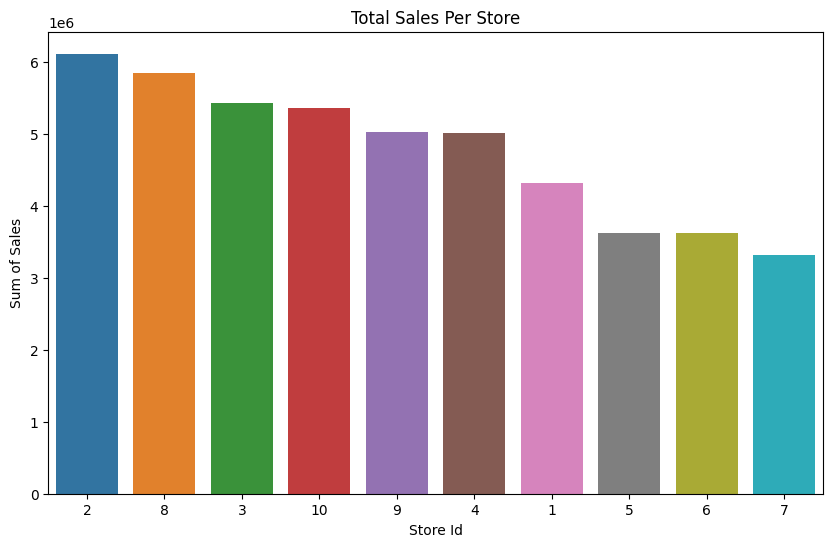

In [18]:
def total_sales_per_store(df):
    sales_by_store = df.groupby('store')['sales'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='store', y='sales', data=sales_by_store, order=sales_by_store.sort_values('sales', ascending=False).store)

    ax.set(xlabel="Store Id", ylabel="Sum of Sales", title="Total Sales Per Store")
    plt.show()

total_sales_per_store(df_all)

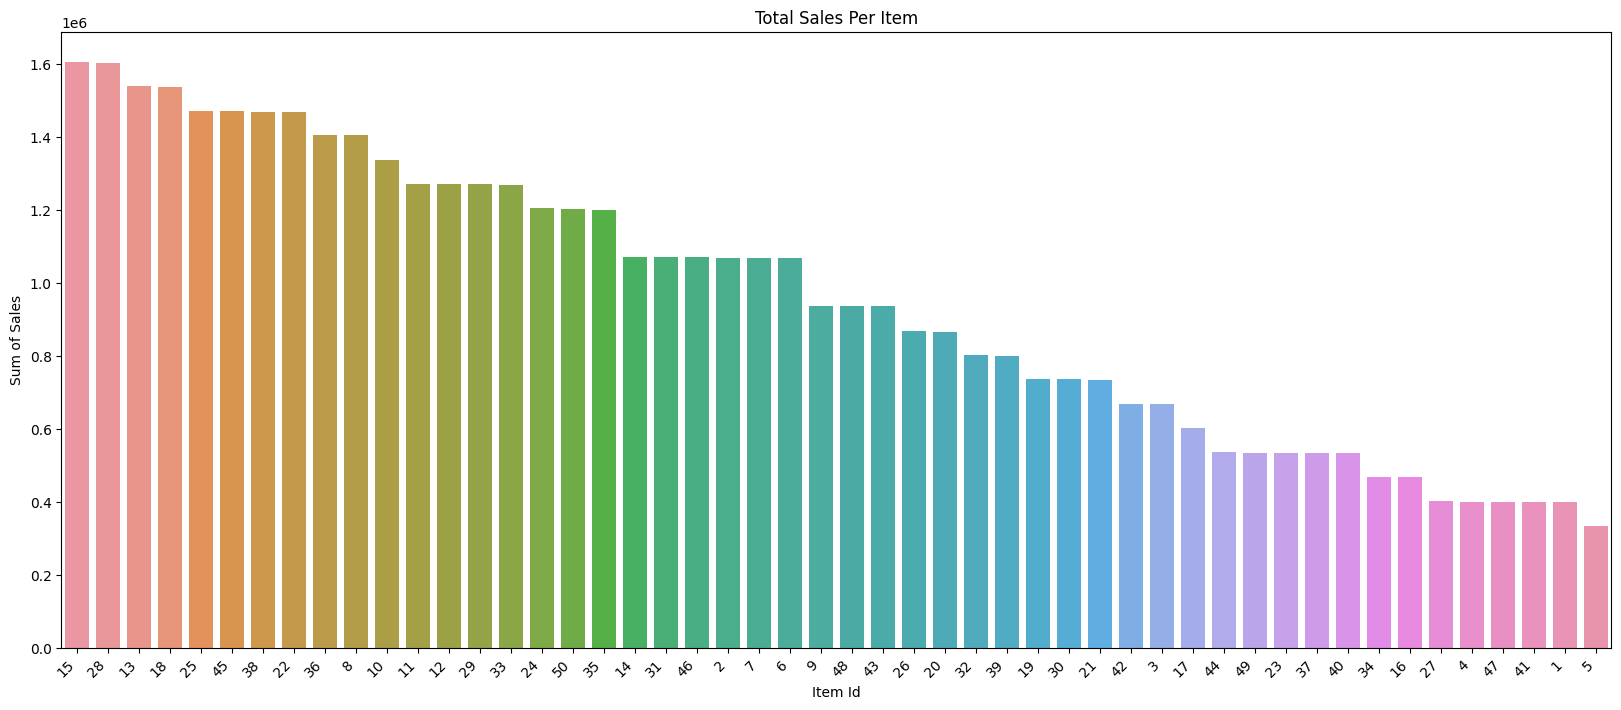

In [22]:
def total_sales_per_item(df):
    sales_by_item = df.groupby('item')['sales'].sum().reset_index()

    fig, ax = plt.subplots(figsize=(20, 8))
    sns.barplot(x='item', y='sales', data=sales_by_item, order=sales_by_item.sort_values('sales', ascending=False).item)

    ax.set(xlabel="Item Id", ylabel="Sum of Sales", title="Total Sales Per Item")
    plt.xticks(rotation=45, ha="right")
    plt.show()

total_sales_per_item(df_all)

In [23]:
item_sales_per_store = df_all.groupby(['store', 'item'])['sales'].sum()
item_sales_per_store

store  item
1      1        36468.0
       2        97050.0
       3        60638.0
       4        36440.0
       5        30335.0
                 ...   
10     46      120601.0
       47       45204.0
       48      105570.0
       49       60317.0
       50      135192.0
Name: sales, Length: 500, dtype: float64

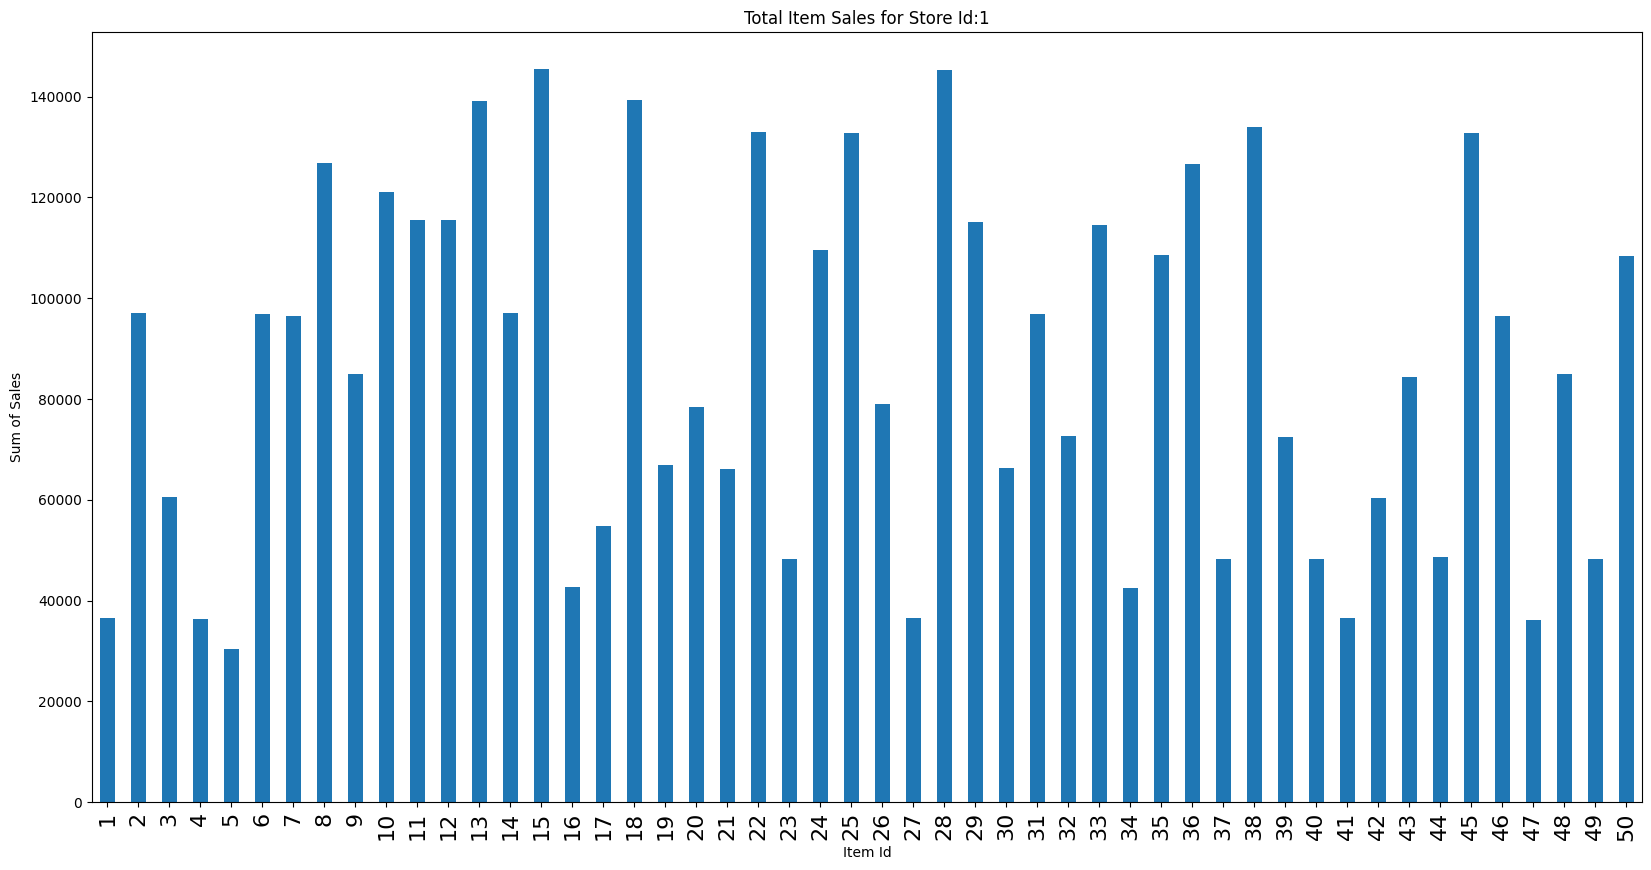

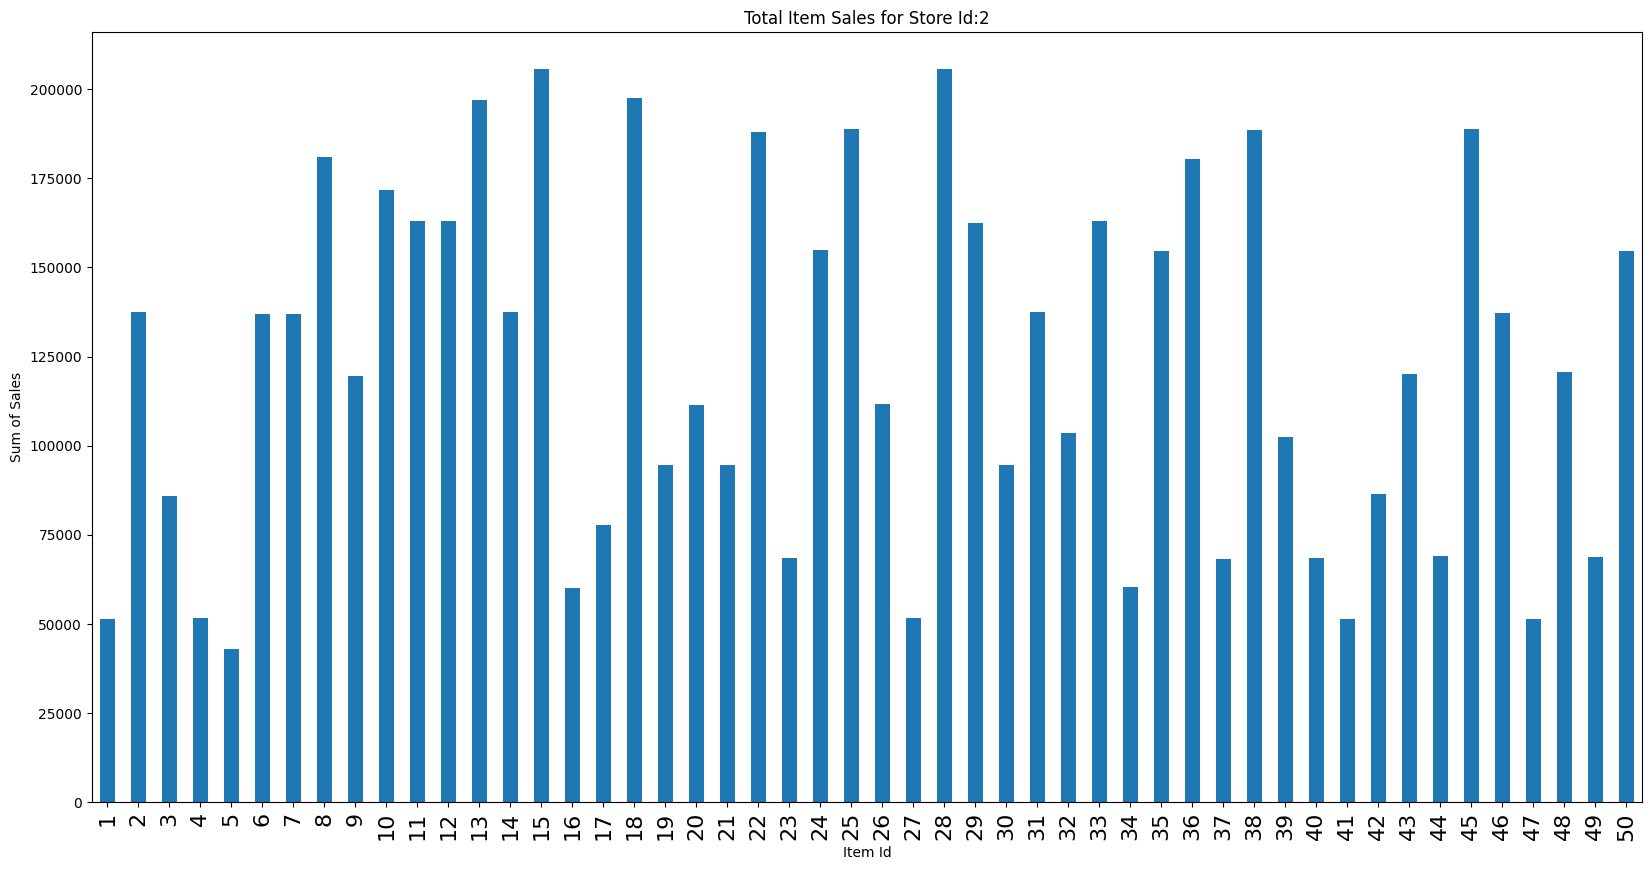

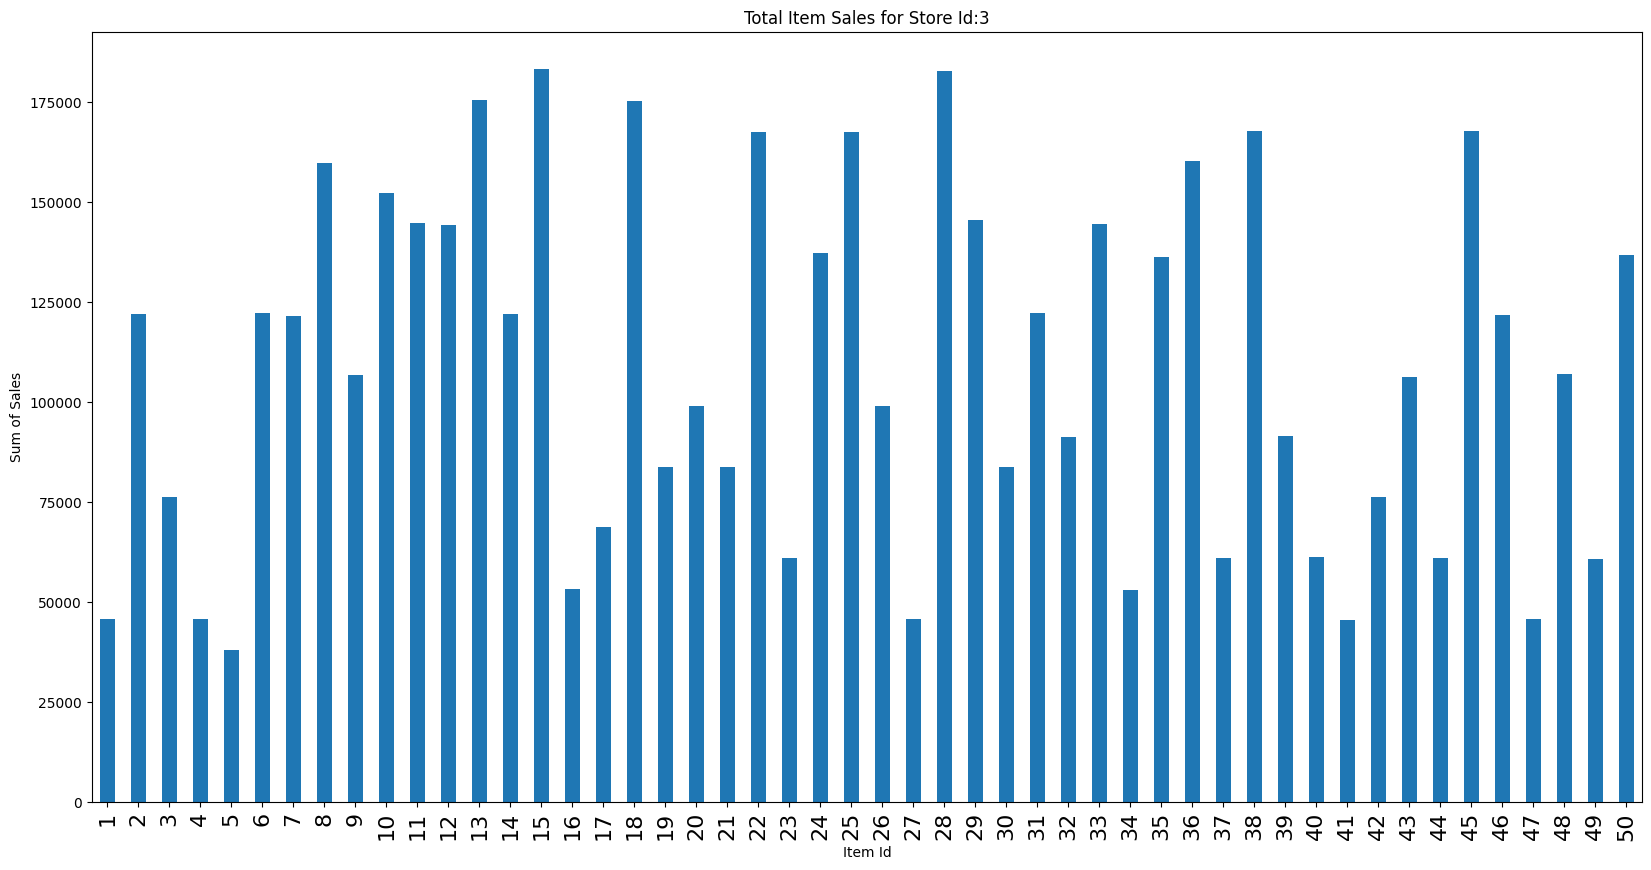

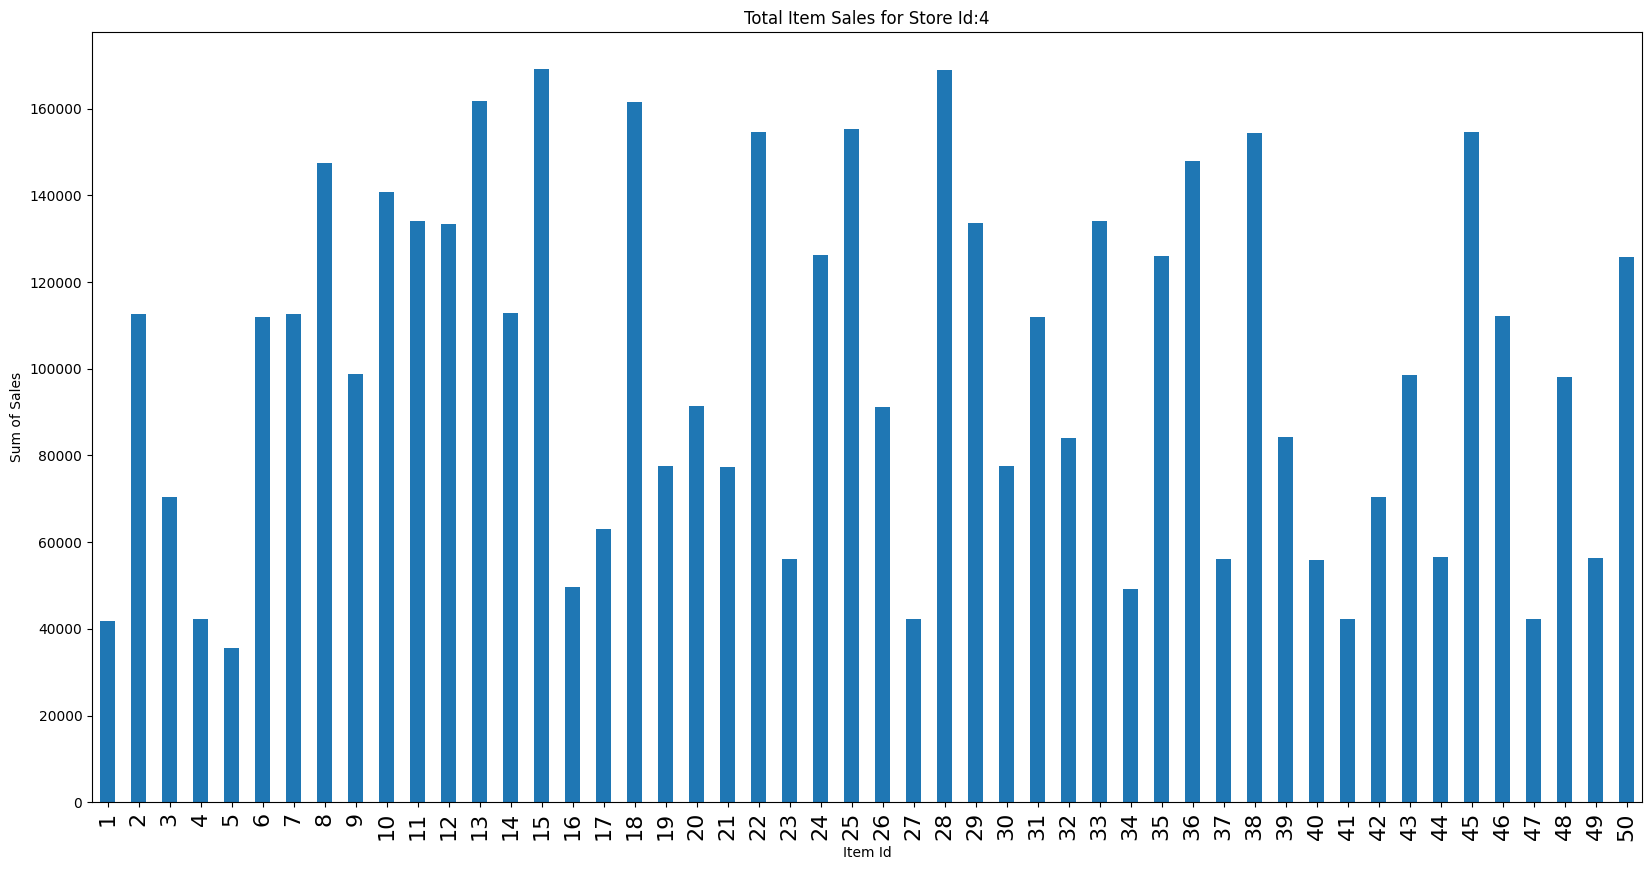

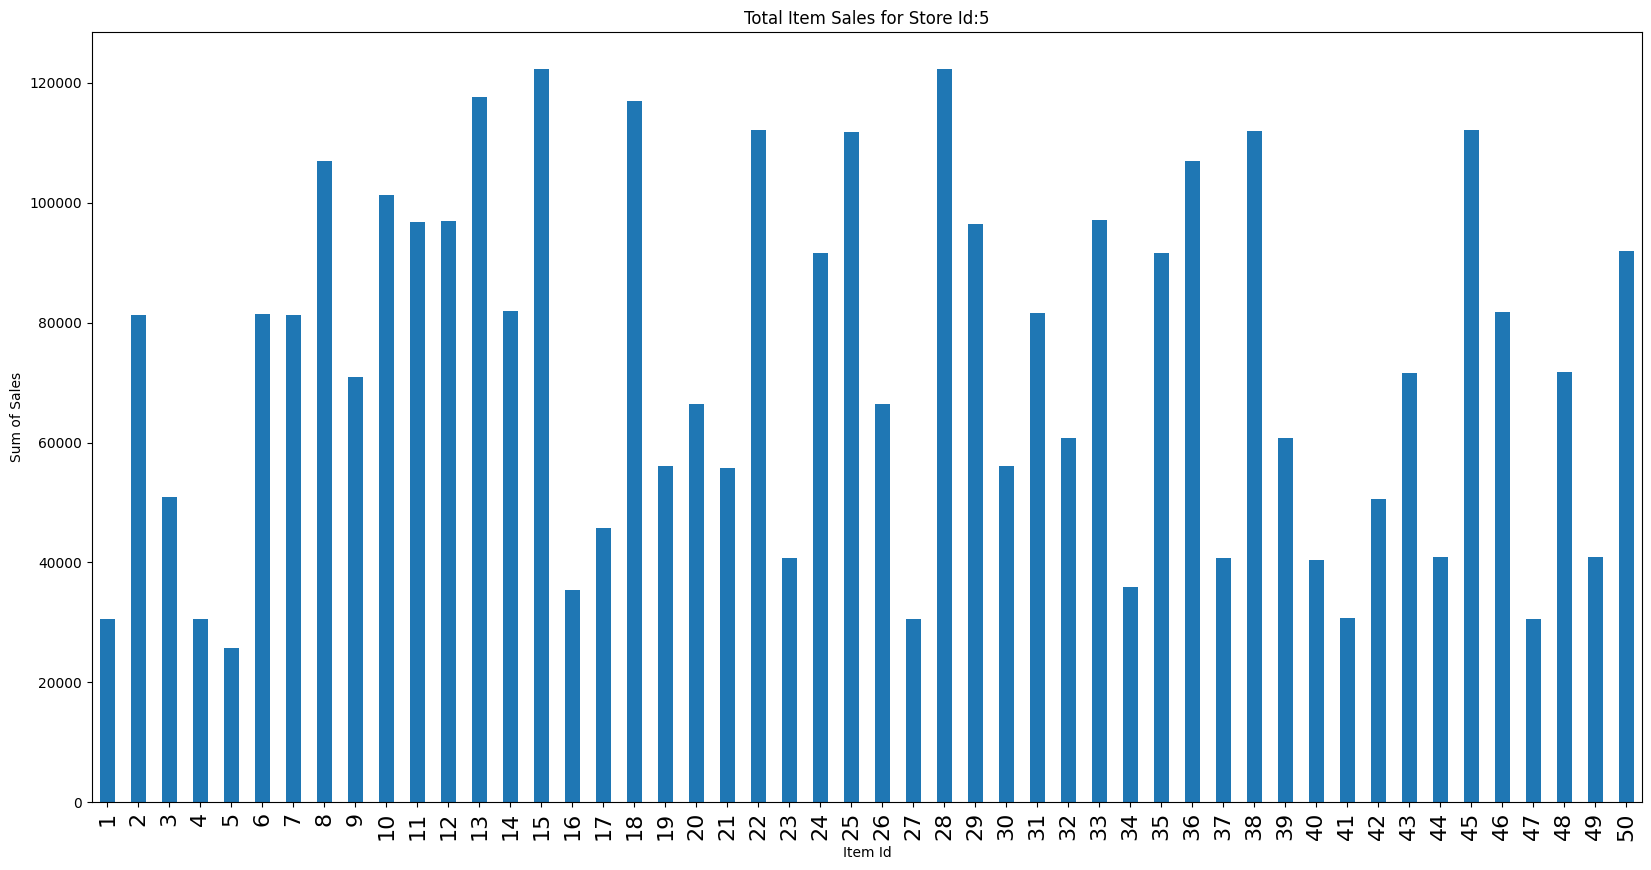

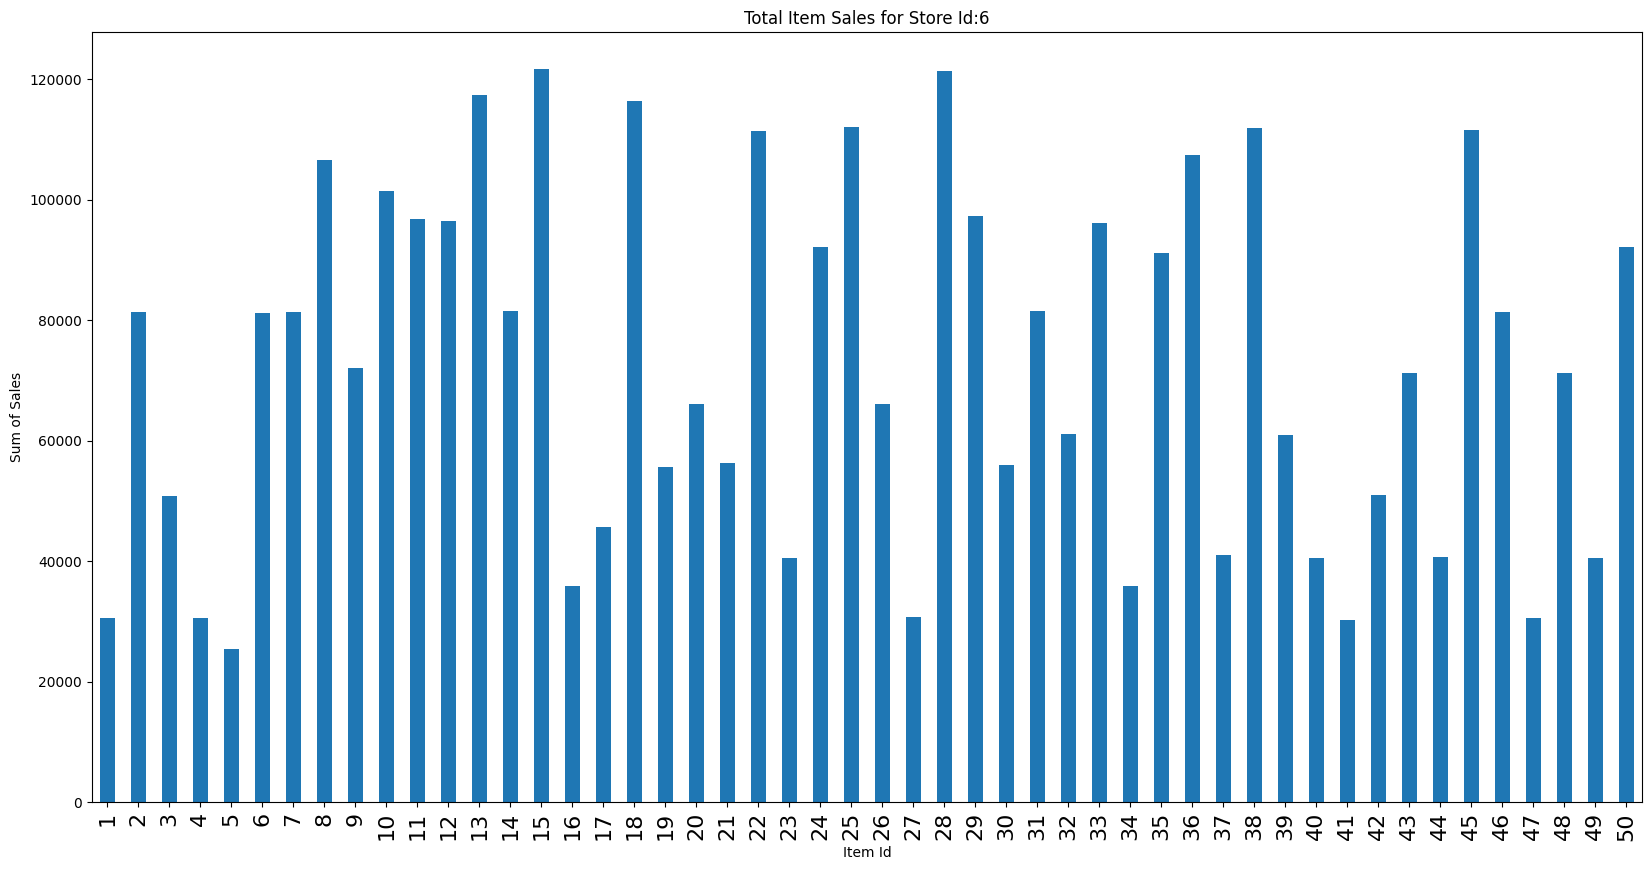

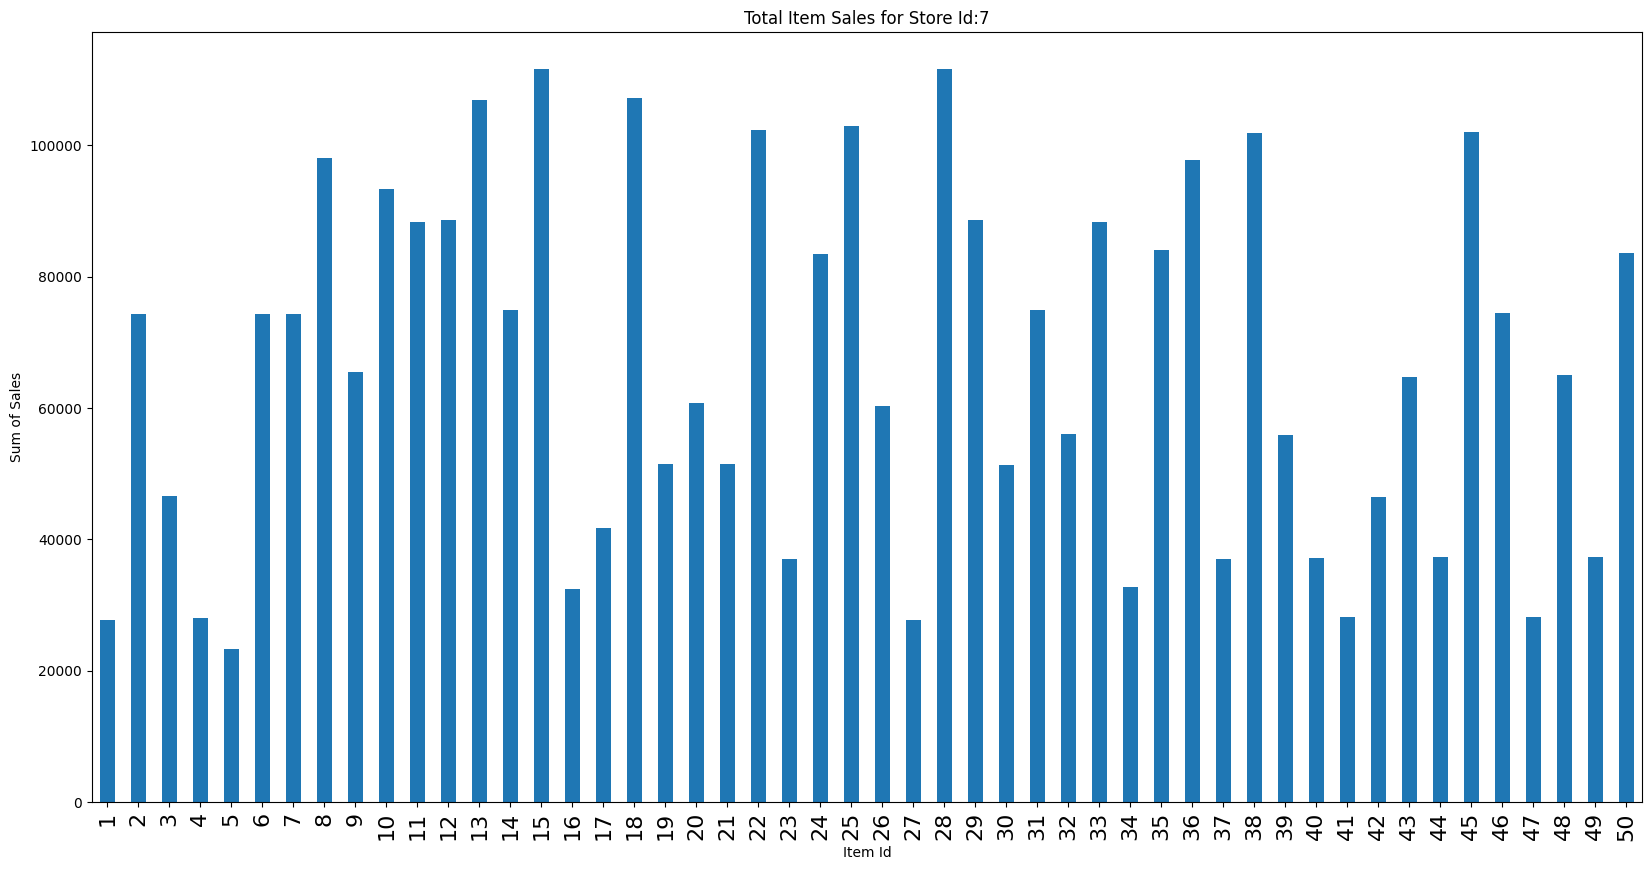

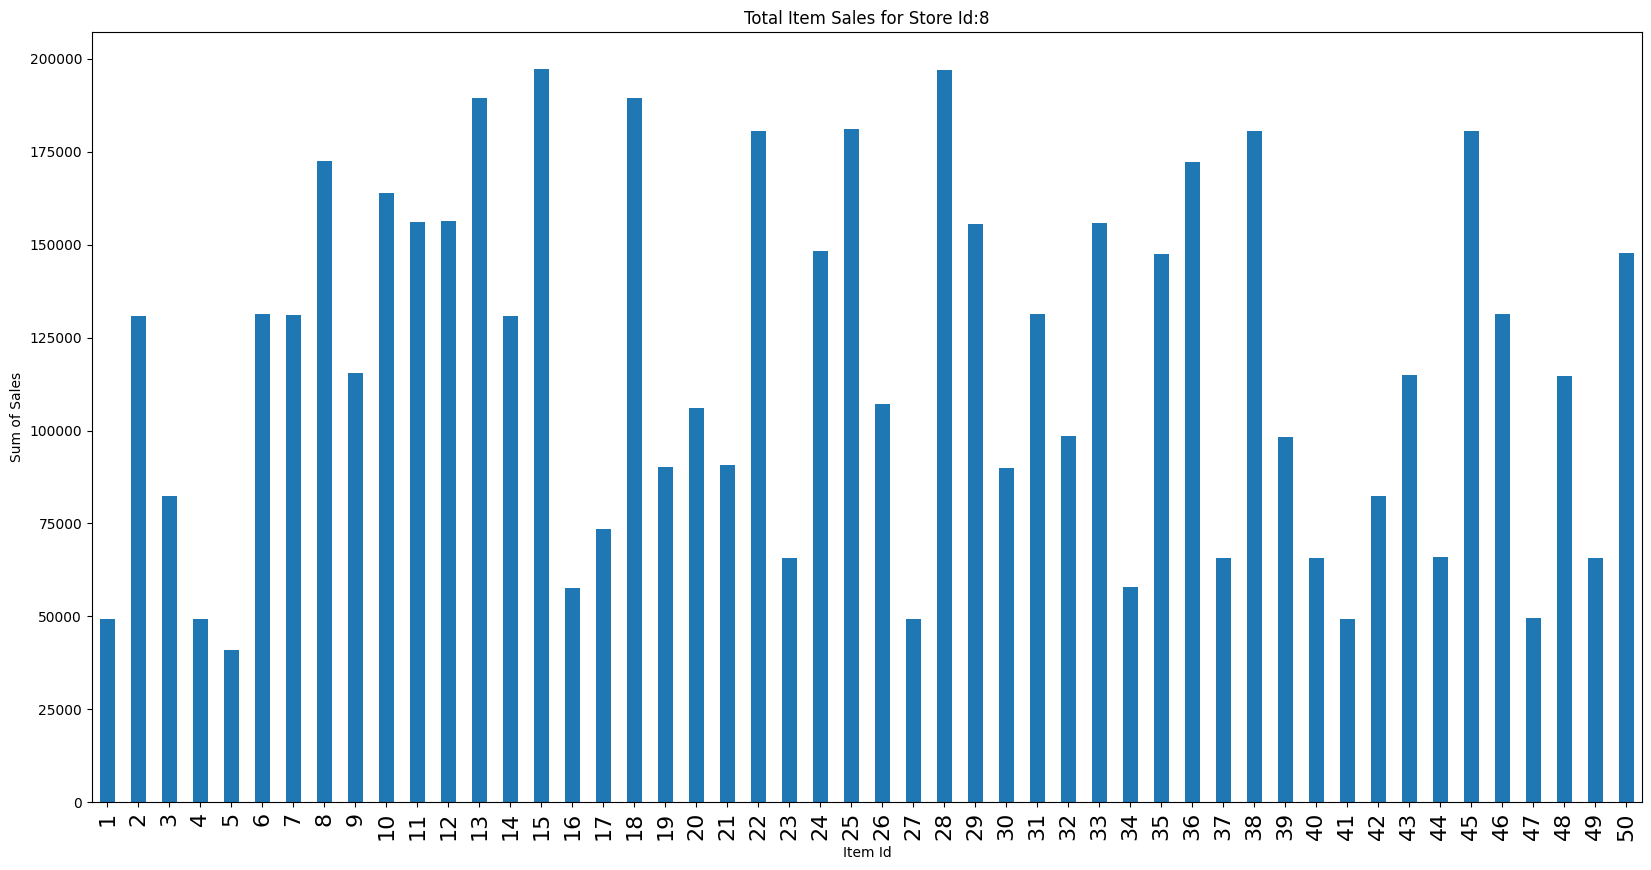

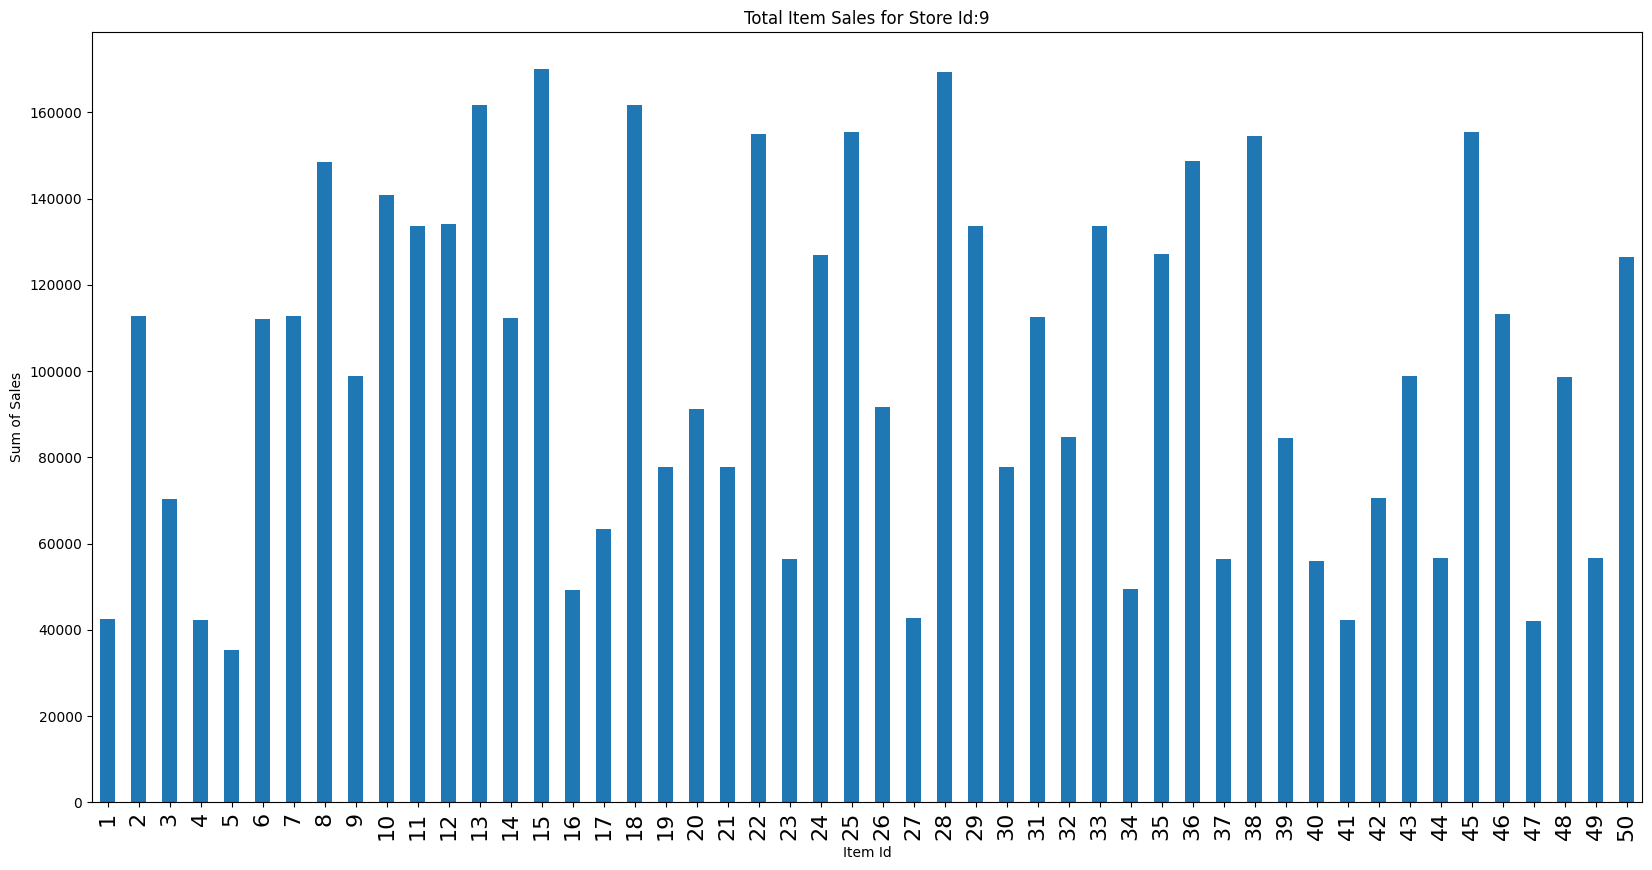

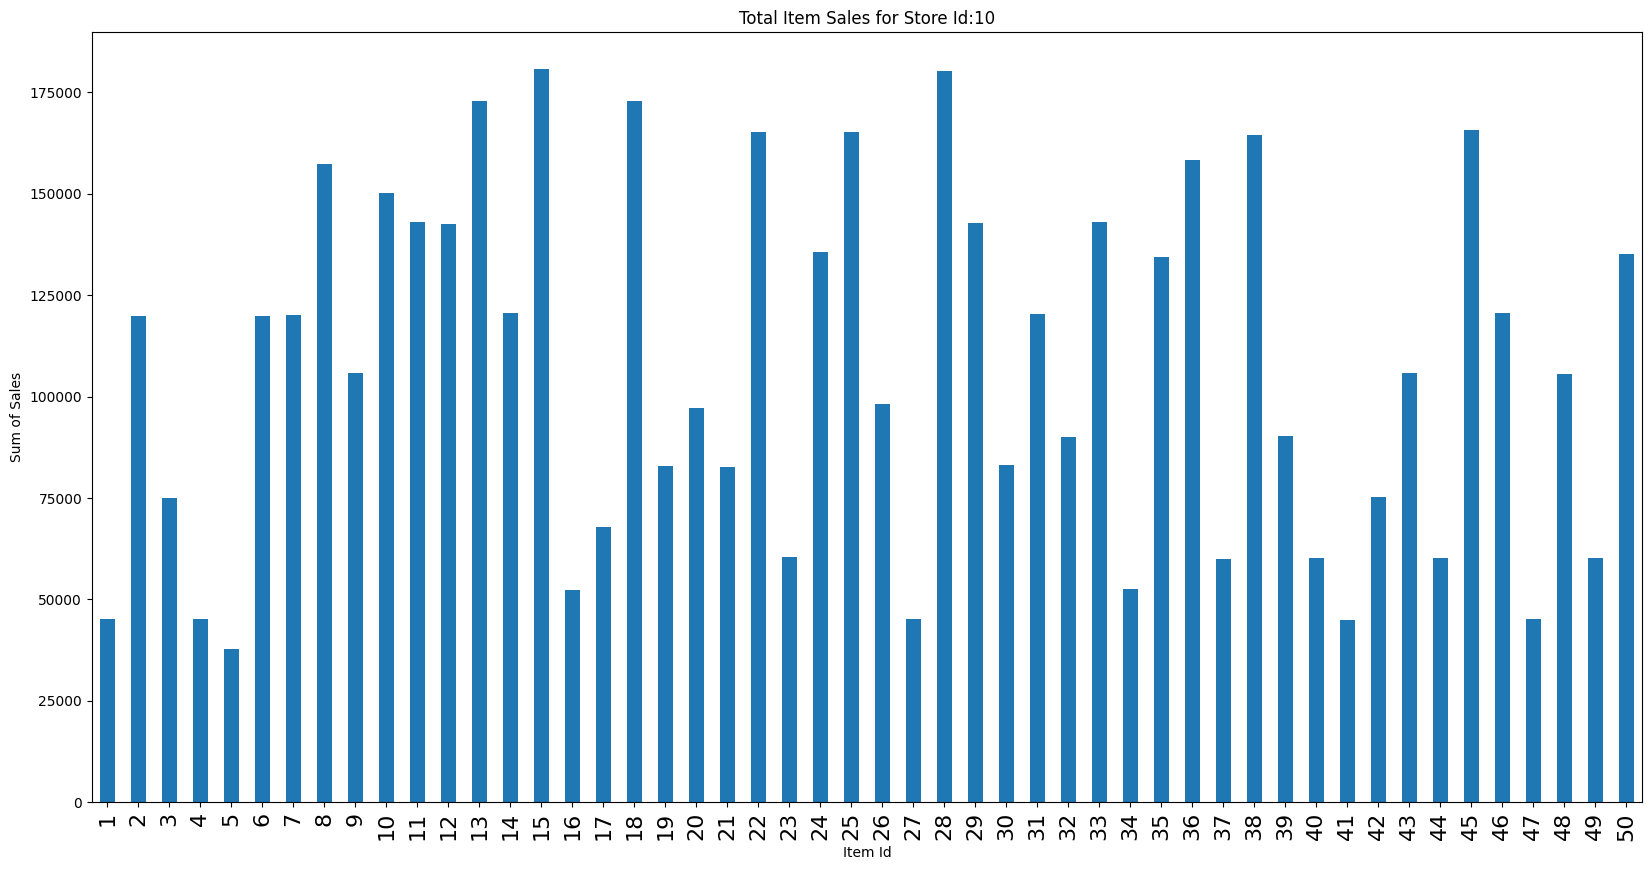

In [24]:
for i in df_all.store.unique():
    plt.figure(figsize=(20,10))
    item_sales_per_store.loc[i,:].plot(kind= "bar")

    plt.xlabel("Item Id"),
    plt.ylabel("Sum of Sales")
    plt.title("Total Item Sales for Store Id:{}".format(i))

    plt.xticks(fontsize=16, rotation=90)

    plt.show();

In [25]:
def create_date_time_features(df):

    df = df.copy()

    df['month'] = df.date.dt.month
    df['day_of_month'] = df.date.dt.day
    df['day_of_year'] = df.date.dt.dayofyear
    df['week_of_year'] = df.date.dt.weekofyear
    df['day_of_week'] = df.date.dt.weekday
    df['year'] = df.date.dt.year
    df['quarter'] = df.date.dt.quarter
    df["is_wknd"] = (df.date.dt.weekday > 4).astype(int)
    df['is_month_start'] = df.date.dt.is_month_start.astype(int)
    df['is_month_end'] = df.date.dt.is_month_end.astype(int)


    df["season"] = np.where(df.month.isin([12,1,2]), 0, 1)
    df["season"] = np.where(df.month.isin([6,7,8]), 2, df["season"])
    df["season"] = np.where(df.month.isin([9, 10, 11]), 3, df["season"])

    return df

In [26]:
df1= create_date_time_features(df_all)
df1

,date,store,item,sales,id,month,day_of_month,day_of_year,week_of_year,day_of_week,year,quarter,is_wknd,is_month_start,is_month_end,season
0,2013-01-01,1,1,13.0,NaN,1,1,1,1,1,2013,1,0,1,0,0
1,2013-01-02,1,1,11.0,NaN,1,2,2,1,2,2013,1,0,0,0,0
2,2013-01-03,1,1,14.0,NaN,1,3,3,1,3,2013,1,0,0,0,0
3,2013-01-04,1,1,13.0,NaN,1,4,4,1,4,2013,1,0,0,0,0
4,2013-01-05,1,1,10.0,NaN,1,5,5,1,5,2013,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,2018-03-27,10,50,NaN,44995.0,3,27,86,13,1,2018,1,0,0,0,1
44996,2018-03-28,10,50,NaN,44996.0,3,28,87,13,2,2018,1,0,0,0,1
44997,2018-03-29,10,50,NaN,44997.0,3,29,88,13,3,2018,1,0,0,0,1
44998,2018-03-30,10,50,NaN,44998.0,3,30,89,13,4,2018,1,0,0,0,1


In [27]:
df1.groupby(["store", "item", "year", "month"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                          sum       mean median        std
store item year month                                     
1     1    2013 1       328.0  10.580645   10.0   3.085171
                2       322.0  11.500000   11.0   3.048983
                3       477.0  15.387097   15.0   3.537206
                4       522.0  17.400000   18.0   4.295948
                5       531.0  17.129032   16.0   5.327551
...                       ...        ...    ...        ...
10    50   2017 11     2574.0  85.800000   81.5  14.653233
                12     1987.0  64.096774   66.0  10.428662
           2018 1         0.0        NaN    NaN        NaN
                2         0.0        NaN    NaN        NaN
                3         0.0        NaN    NaN        NaN

[31500 rows x 4 columns]

In [28]:
df1.groupby(["store", "item", "month"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                      sum       mean median        std
store item month                                      
1     1    1       2125.0  13.709677   13.0   4.397413
           2       2063.0  14.631206   14.0   4.668146
           3       2728.0  17.600000   17.0   4.545013
           4       3118.0  20.786667   20.0   4.894301
           5       3448.0  22.245161   22.0   6.564705
...                   ...        ...    ...        ...
10    50   8      13108.0  84.567742   85.0  15.676527
           9      11831.0  78.873333   79.0  15.207423
           10     11322.0  73.045161   72.0  14.209171
           11     11549.0  76.993333   77.0  16.253651
           12      8724.0  56.283871   56.0  11.782529

[6000 rows x 4 columns]

In [29]:
df1.groupby(["store", "item", "year"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
                     sum       mean median        std
store item year                                      
1     1    2013   6025.0  16.506849   16.0   5.568069
           2014   6889.0  18.873973   19.0   5.910087
           2015   7507.0  20.567123   20.0   6.859982
           2016   7950.0  21.721311   22.0   6.691965
           2017   8097.0  22.183562   22.0   6.953278
...                  ...        ...    ...        ...
10    50   2014  25927.0  71.032877   70.0  17.430364
           2015  27081.0  74.194521   74.0  19.141405
           2016  29452.0  80.469945   82.0  18.974328
           2017  30260.0  82.904110   81.0  20.644136
           2018      0.0        NaN    NaN        NaN

[3000 rows x 4 columns]